In [30]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

#Loading the dataset as df
df = pd.read_csv("netflix_full.csv")

In [31]:
#previewing the first five rows of the dataset
df.head()

,id,type,name,creator,starring,year,rating,time,genres,country,describle
0,81416533,Movie,Heart of Stone,NaN,"Gal Gadot, Jamie Dornan, Alia Bhatt",2023,TV-PG,125 min,"Drama Movies ,Action & Adventure Movies ,Spy M...",United States,An intelligence operative for a shadowy global...
1,80991406,Movie,Johnny English Strikes Again,NaN,"Rowan Atkinson, Ben Miller, Emma Thompson",2018,TV-PG,88 min,"Family Movies ,Comedy Movies ,Action & Adventu...",United States,After a cyberattack exposes every undercover a...
2,81644420,Movie,Hunt,NaN,"Lee Jung-jae, Jung Woo-sung, Jeon Hye-jin",2022,TV-14,125 min,"Drama Movies ,Action & Adventure Movies ,Spy M...",South Korea,As a pair of national security agents hunt a N...
3,70208104,Movie,Safe House,NaN,"Denzel Washington, Ryan Reynolds, Vera Farmiga",2012,TV-14,114 min,"Action & Adventure Movies ,Spy Movies",United States,CIA operative Matt Weston must get a dangerous...
4,70297761,Movie,Commitment,NaN,"Choi Seung-hyun, Han Ye-ri, Yoon Je-moon",2013,TV-14,112 min,"Action & Adventure Movies ,Spy Movies",South Korea,After taking on a spying mission to free his s...


In [32]:
#checking for null values
df.isnull().sum()

id              0
type            0
name            0
creator      2543
starring        0
year            0
rating          0
time            0
genres          1
country       282
describle       0
dtype: int64

In [33]:
#checking the shape of the dataframe
df.shape

(3256, 11)

In [34]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3256 non-null   int64 
 1   type       3256 non-null   object
 2   name       3256 non-null   object
 3   creator    713 non-null    object
 4   starring   3256 non-null   object
 5   year       3256 non-null   int64 
 6   rating     3256 non-null   object
 7   time       3256 non-null   object
 8   genres     3255 non-null   object
 9   country    2974 non-null   object
 10  describle  3256 non-null   object
dtypes: int64(2), object(9)
memory usage: 279.9+ KB


In [35]:
#dropping the columns with too many null values
data = df.drop(["id", "country", "creator"], axis=1)
data.head()

,type,name,starring,year,rating,time,genres,describle
0,Movie,Heart of Stone,"Gal Gadot, Jamie Dornan, Alia Bhatt",2023,TV-PG,125 min,"Drama Movies ,Action & Adventure Movies ,Spy M...",An intelligence operative for a shadowy global...
1,Movie,Johnny English Strikes Again,"Rowan Atkinson, Ben Miller, Emma Thompson",2018,TV-PG,88 min,"Family Movies ,Comedy Movies ,Action & Adventu...",After a cyberattack exposes every undercover a...
2,Movie,Hunt,"Lee Jung-jae, Jung Woo-sung, Jeon Hye-jin",2022,TV-14,125 min,"Drama Movies ,Action & Adventure Movies ,Spy M...",As a pair of national security agents hunt a N...
3,Movie,Safe House,"Denzel Washington, Ryan Reynolds, Vera Farmiga",2012,TV-14,114 min,"Action & Adventure Movies ,Spy Movies",CIA operative Matt Weston must get a dangerous...
4,Movie,Commitment,"Choi Seung-hyun, Han Ye-ri, Yoon Je-moon",2013,TV-14,112 min,"Action & Adventure Movies ,Spy Movies",After taking on a spying mission to free his s...


In [36]:
#replacing the 1 null in genres column with x
data["genres"]=data["genres"].fillna("x")

In [37]:
#double checking for null values
data.isnull().sum()

type         0
name         0
starring     0
year         0
rating       0
time         0
genres       0
describle    0
dtype: int64

In [38]:
#creating a dataframe with distinct values in "type" column
film_type = data["type"].value_counts()
film_type

type
Movie      1662
TV Show    1594
Name: count, dtype: int64

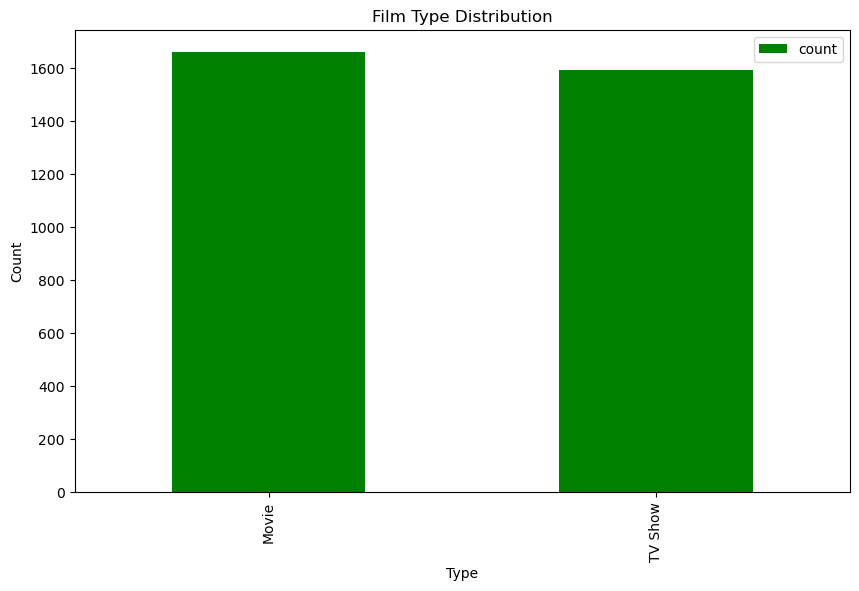

In [39]:
#plotting a film type ditribution bar graph
plt.figure(figsize=(10,6))
film_type.plot(kind="bar", color="green")
plt.title("Film Type Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.legend(loc="upper right")
plt.show()

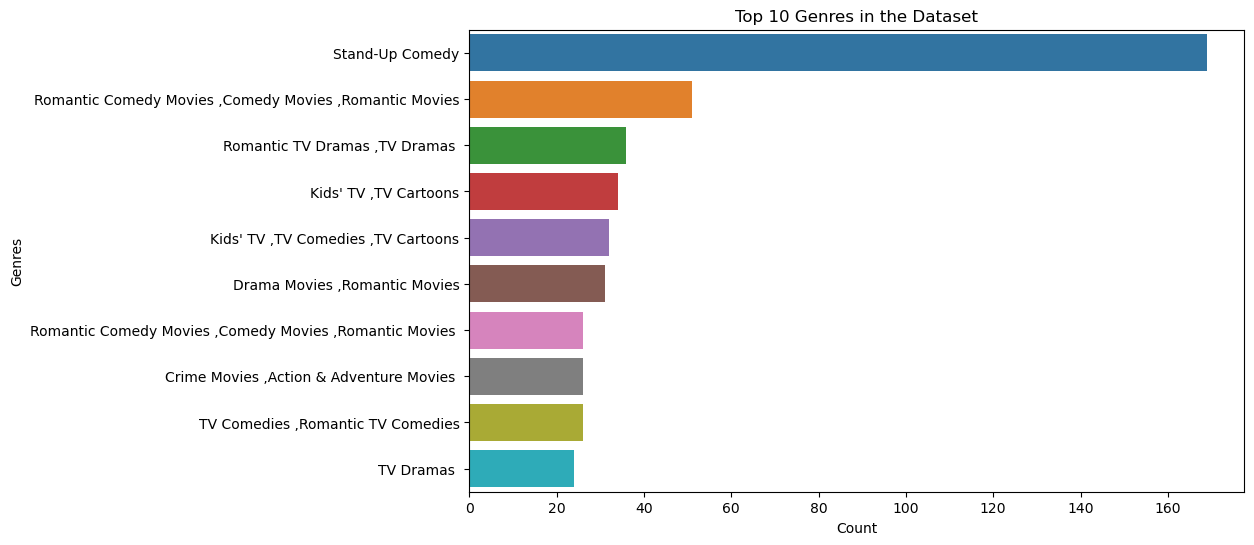

In [40]:
#plotting a film genre graph
film_genre = data["genres"].value_counts()
top_10_genres = film_genre.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index)
plt.title("Top 10 Genres in the Dataset")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.show()

In [41]:
#finding distinct movie runtimes
film_runtime = data["time"].value_counts()
film_runtime

time
1 Season     1055
2 Seasons     249
3 Seasons     114
4 Seasons      52
95 min         44
             ... 
2h 2m           1
1h 33m          1
172 min         1
1h 8m           1
162 min         1
Name: count, Length: 192, dtype: int64

C:\Users\Randell\AppData\Local\Temp\ipykernel_20280\2737388117.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['minutes'] = data_filtered['time'].apply(convert_to_minutes)
C:\Users\Randell\AppData\Local\Temp\ipykernel_20280\2737388117.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['category'] = data_filtered['minutes'].apply(lambda x: '>120 min' if x > 120 else '<=120 min')


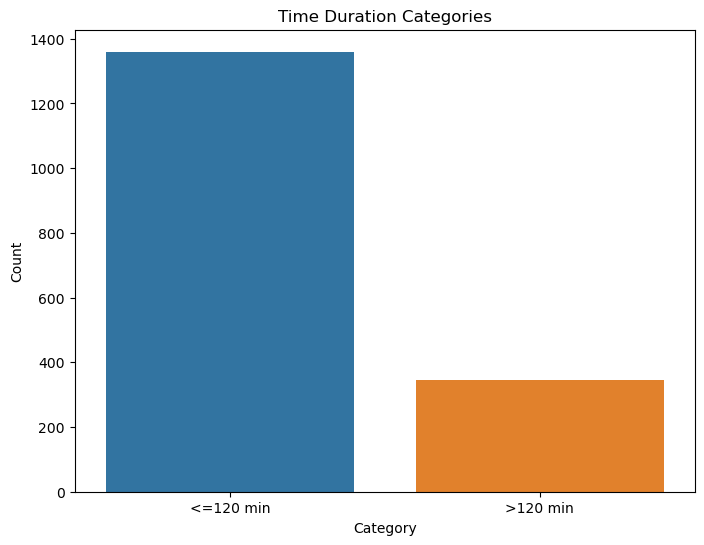

In [44]:
data_filtered = data[~data['time'].str.contains('Season')]

# Function to convert time to minutes
def convert_to_minutes(time_str):
    if 'h' in time_str:
        hours = int(re.search(r'(\d+)h', time_str).group(1))
        minutes = re.search(r'(\d+)m', time_str)
        if minutes:
            minutes = int(minutes.group(1))
        else:
            minutes = 0
        total_minutes = hours * 60 + minutes
    else:
        total_minutes = int(re.search(r'(\d+)', time_str).group(1))
    return total_minutes

# Apply the conversion function
data_filtered['minutes'] = data_filtered['time'].apply(convert_to_minutes)

# Categorize the entries
data_filtered['category'] = data_filtered['minutes'].apply(lambda x: '>120 min' if x > 120 else '<=120 min')

# Count the categories
category_counts = data_filtered['category'].value_counts()

# Plot the graph
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Time Duration Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()